In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('data.csv')

In [6]:
len(df)

11914

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp'>

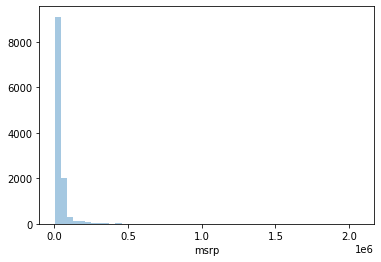

In [10]:
sns.distplot(df.msrp, kde=False)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp'>

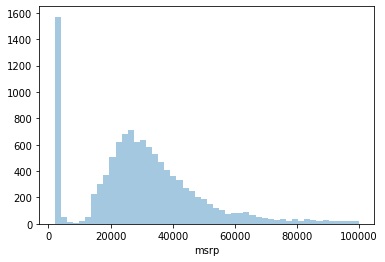

In [11]:
sns.distplot(df.msrp[df.msrp<100000],kde=False)

In [12]:
log_price=np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp'>

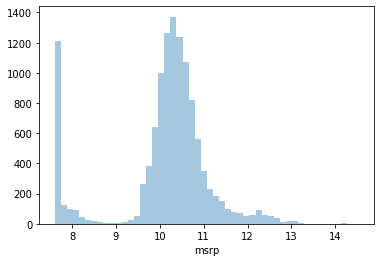

In [13]:
sns.distplot(log_price, kde=False)

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [16]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [17]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [18]:
def g(xi):
    # xi is a list with n elements
    # do something w/ xi
    # return the result
    pass

In [19]:
xi = [453,11,86]

In [20]:
y_pred = g(xi)

In [21]:
w0 = 7.17
w = [0.01,0.04,0.002]
n = 3

def linear_regression(xi):
    result=w0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result


In [22]:
print(np.exp(linear_regression(xi)))

222348.2221101062


In [23]:
print(np.exp(w0))

1299.8446028040269


In [24]:
def dot(xi,w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result


In [25]:
print(np.exp(w0 + dot(xi,w)))

222348.22211010658


In [26]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [27]:
linear_regression(xi)

12.312000000000001

In [28]:
def linear_regression(xi):
    return w0 + xi.dot(w)

In [29]:
linear_regression(np.asarray(xi))

12.312000000000001

In [30]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w = [w0] + w

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w)

In [31]:
linear_regression(xi)

12.312

In [32]:
x1 =  [1, 148, 24, 1385]
x2 =  [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

In [33]:
X = [x1, x2, x10]

In [34]:
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [35]:
np.asarray(X)

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [36]:
predictions = []

for xi in X:
    pred = dot(xi,w)
    predictions.append(pred)

In [37]:
predictions

[12.379999999999999, 13.552, 12.312]

In [38]:
np.exp(predictions)

array([237993.82334859, 768349.51018973, 222348.22211011])

In [39]:
predictions =np.asarray(X).dot(w)

In [40]:
predictions

array([12.38 , 13.552, 12.312])

In [41]:
X=np.asarray(X)

In [42]:
np.linalg.inv(X.T.dot(X).dot(X.T).dot(y))

NameError: name 'y' is not defined

In [43]:
def linear_regression(X,y):
    #add dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [44]:
y_pred = w0 + X.dot(w)

In [45]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

df_num = df_train[base]

df_num = df_num.fillna(0)

In [46]:
X_train = df_num.values
X_train.shape

(7150, 5)

In [47]:
y_train.shape

(7150,)

In [48]:
w_0, w = linear_regression(X_train, y_train)

In [49]:
w.shape

(5,)

In [53]:
y_pred = w_0 + X_train.dot(w)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


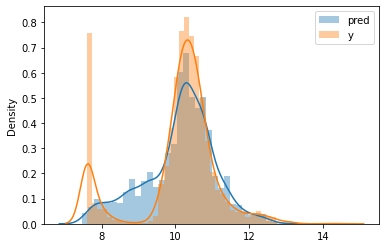

In [72]:
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='y')
plt.legend()

In [55]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [59]:
rmse(y_train, y_pred)

0.7554192603920132

In [60]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [61]:
X_val.shape

(2382, 5)

In [62]:
y_pred = w_0 + X_val.dot(w)

In [63]:
rmse(y_val, y_pred)

0.761653099130156

In [107]:
def prepare_X(df):
    
    df = df.copy()
    features = base.copy()
    
    for v in [2,3,4]:
        feature = 'num_doors_%s' % v 
        value = (df['number_of_doors'] == v).astype(int)
        df[feature] = value
        features.append(feature)
        
    for v in ['chevrolet','ford','volkswagen','toyota','dodge']:
        feature = 'num_make_%s' % v 
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 
              'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v 
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic','manual','automated_manual']:
        feature = 'is_transmission_%s' % v 
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive','rear_wheel_drive','all_wheel_drive','four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v 
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover','flex_fuel','luxury','luxury,performance','hatchback']:
        feature = 'is_mc_%s' % v 
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)    
        
    for v in ['compact','midsize','large']:
        feature = 'is_size_%s' % v 
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan','4dr_suv','coupe','convertible','4dr_hatchback']:
        feature = 'is_style_%s' % v 
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)    
        
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X=df_num.values
    return X

In [108]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:',rmse(y_val, y_pred))

validation: 23.42207419411859


In [77]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [113]:
def linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [118]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('validation:', '%6s' %r,rmse(y_val, y_pred))

validation:  1e-06 0.46022554335130095
validation: 0.0001 0.46022549419665876
validation:  0.001 0.46022676264244966
validation:   0.01 0.46023949628826694
validation:    0.1 0.4603700695870939
validation:      1 0.4618298042651329
validation:      5 0.4684079627532482
validation:     10 0.47572481006945855


In [119]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:',rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:',rmse(y_test, y_pred))

validation: 0.46023949628826694
test: 0.45718136789131464
